In [22]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

folder = '../../Gridsearch_140820'

csvs = []

count_nan = 0
for i, file in enumerate(os.listdir(folder + '/csvs')):
    df = pd.read_csv(folder + '/csvs' + '/' + file)
    if (df.batch_size == 64).any():
        df.rename(columns={'Unnamed: 0' : 'epoch'}, inplace=True)
        count_nan += df.shape[0] * df.shape[1] - np.sum(df.count())
        df['list_index'] = len(csvs)
        csvs.append(df)

print(f"Total number of Nans: {count_nan}")

Total number of Nans: 0


In [2]:
nan_index = []
for i, df in enumerate(csvs):
    nan_index.append(list(df[(df['val_acc'].isnull()) | (df['train_acc'].isnull()) |(df['train_updates'].isnull()) | (df['val_updates'].isnull())].index))

print(nan_index)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [3]:
# weird_acc = []
# for i, df in enumerate(csvs):
#     weird_acc.append(list(df[(df['val_acc']>1) | (df['val_acc']<0.1) | (df['train_acc']>1) | (df['train_acc']<0.1)].index))
# # for df in csvs:
# #     df.drop(df[(df['val_acc']>1) | (df['val_acc']<0)].index, inplace = True)
#
# see = [csvs[i].iloc[l[0]] for i, l in enumerate(weird_acc) if l]
#
# early_stopped_dfs = []
# for i in range(len(csvs)):
#     n = nan_index[i]
#     v = weird_acc[i]
#     if n and v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(min(v), min(n))]])
#     elif n:
#         early_stopped_dfs.append(csvs[i].iloc[[min(n)]])
#     elif v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(v)]])
#

In [4]:
# early_stopped = pd.concat(early_stopped_dfs)
# early_stopped.drop(columns=['val_acc', 'train_acc', 'val_updates', 'train_updates', 'early_stopping'], inplace=True)
# print("Networks that stopped early")
# early_stopped
# csvs[0].columns
# csvs[2]
# for df in csvs:
#     print(len(df))

In [5]:
# manual_early_stopping = {4: 36,5: 28, 12: 12, 14:27, 32:18, 35:23, 41:35, 46: 12,53:12}
#
# for key, val in manual_early_stopping.items():
#     csvs[key].drop(labels = range(val, 40), inplace=True)

In [6]:
big_df = pd.concat(csvs)
big_df.describe()

,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,list_index
count,4940.000000,4940.0,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4.940000e+03,4.940000e+03,4940.000000
mean,16.921457,64.0,0.001962,64.602429,0.003620,0.052231,0.964777,23.564198,1037.049009,6.139006e-01,1.033954e+03,79.442105
std,12.106328,0.0,0.002094,26.098445,0.004466,0.047504,0.842036,239.383641,1191.829483,1.789839e-01,1.174374e+03,47.196166
min,0.000000,64.0,0.000100,32.000000,0.000100,0.005000,0.000000,0.000000,0.000000,2.470328e-322,6.914296e-310,0.000000
25%,7.000000,64.0,0.000100,32.000000,0.000100,0.005000,0.000000,0.499599,19.653020,5.004674e-01,5.810280e+01,38.000000
50%,15.000000,64.0,0.001000,64.000000,0.001000,0.005000,1.000000,0.561599,164.473907,5.579928e-01,1.780553e+02,80.000000
75%,24.000000,64.0,0.005000,96.000000,0.010000,0.100000,2.000000,0.752529,2520.000000,7.575120e-01,2.520000e+03,122.000000
max,49.000000,64.0,0.005000,96.000000,0.010000,0.100000,2.000000,2520.000000,2520.000000,4.643697e+00,2.520000e+03,161.000000


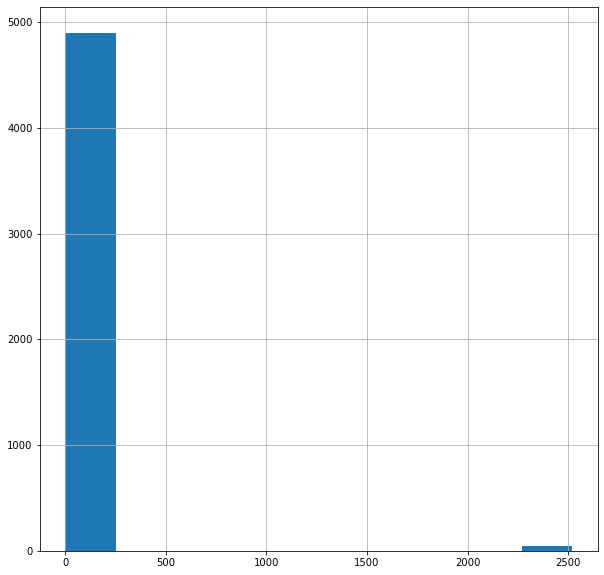

In [7]:
big_df['val_acc'].hist(figsize=(10, 10))

In [8]:
best_rows = []
best_accs = []
for df in csvs:
    best_accs.append(df.loc[:, 'val_acc'].max())
    best_rows.append(df.loc[df.loc[:, 'val_acc'].argmax()].to_dict())

In [9]:
best_df = pd.DataFrame(best_rows)

In [10]:
print("Dataframe with all best epochs for Validation accuracy")
best_df.sort_values(by='epoch')


Dataframe with all best epochs for Validation accuracy


,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,trial,early_stopping,val_acc,val_updates,train_acc,train_updates,list_index
80,0,64,0.0010,32,0.0100,0.005,2,yes,0.499599,2520.000000,0.509148,1245.971436,80
98,0,64,0.0001,64,0.0100,0.100,2,yes,0.499599,2520.000000,0.547877,152.881012,98
94,0,64,0.0050,32,0.0010,0.100,1,yes,0.558694,4.900341,0.514089,255.555359,94
26,0,64,0.0010,96,0.0100,0.005,2,yes,0.499599,2520.000000,0.501736,2402.052979,26
88,0,64,0.0050,32,0.0100,0.005,1,yes,0.499599,2520.000000,0.504274,1511.282104,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,48,64,0.0010,32,0.0010,0.005,0,yes,0.834635,76.712341,0.838408,67.794334,84
137,49,64,0.0001,64,0.0001,0.005,2,yes,0.834235,177.157745,0.840745,170.523972,137
135,49,64,0.0001,64,0.0001,0.005,0,yes,0.829627,150.542374,0.837407,158.875397,135
51,49,64,0.0010,96,0.0001,0.005,0,yes,0.808293,91.930893,0.798010,75.710938,51


In [11]:
print("Dataframe with means for trials")
mean_df = best_df.groupby(by=["learning_rate", "hidden_units", "cost_per_sample", "surprisal_cost"])

Dataframe with means for trials


In [12]:
mean_df.min()


epoch  batch_size  \
learning_rate hidden_units cost_per_sample surprisal_cost                      
0.0001        32           0.0001          0.005              24          64   
                                           0.100              27          64   
                           0.0010          0.005              21          64   
                                           0.100              21          64   
                           0.0050          0.005              25          64   
                                           0.100              14          64   
              64           0.0001          0.005              27          64   
                                           0.100              22          64   
                           0.0010          0.005              20          64   
                                           0.100              21          64   
                           0.0050          0.005               8          64   
                                           0.100              10          64   
              96           0.0001          0.005              25          64   
                                           0.100              22          64   
                           0.0010          0.005              22          64   
                                           0.100              21          64   
                           0.0050          0.005               3          64   
                                           0.100               4          64   
0.0010        32           0.0001          0.005              21          64   
                                           0.100              11          64   
                           0.0010          0.005              14          64   
                                           0.100               6          64   
                           0.0050          0.005               0          64   
                                           0.100               0          64   
              64           0.0001          0.005              20          64   
                                           0.100               9          64   
                           0.0010          0.005              17          64   
                                           0.100               5          64   
                           0.0050          0.005               0          64   
                                           0.100               1          64   
              96           0.0001          0.005              16          64   
                                           0.100               0          64   
                           0.0010          0.005              12          64   
                                           0.100               2          64   
                           0.0050          0.005               0          64   
                                           0.100               1          64   
0.0100        32           0.0001          0.005               0          64   
                                           0.100               0          64   
                           0.0010          0.005               0          64   
                                           0.100               0          64   
                           0.0050          0.005               0          64   
                                           0.100               0          64   
              64           0.0001          0.005               0          64   
                                           0.100               0          64   
                           0.0010          0.005               5          64   
                                           0.100               0          64   
                           0.0050          0.005               4          64   
                                           0.100               0          64   
              96           0.0001          0.005           

In [13]:
lr0001 = [csv for csv in csvs if csv['learning_rate'][0]==0.0001 and csv['hidden_units'][0]==32]

# temp = bs64_best.loc[(best_df['hidden_units']==96)]

C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 fi

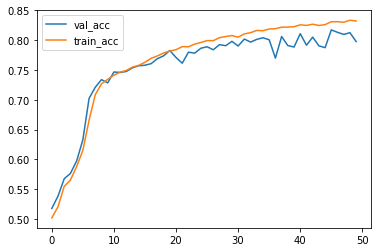

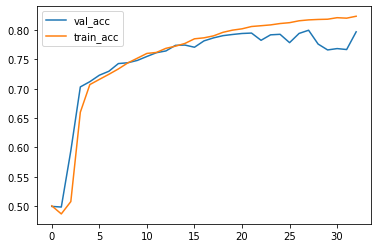

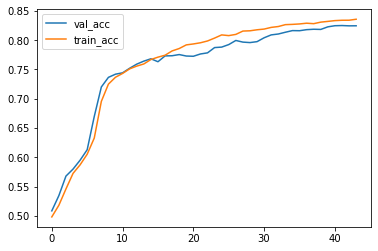

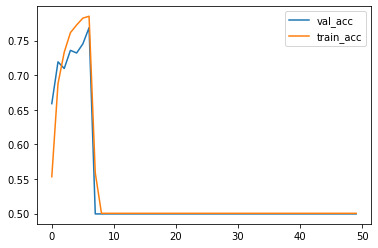

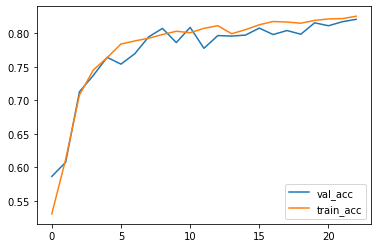

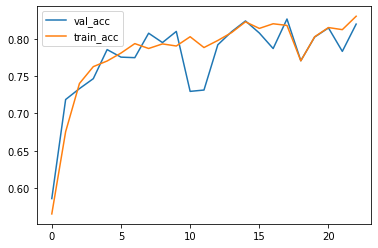

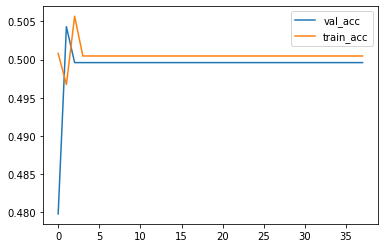

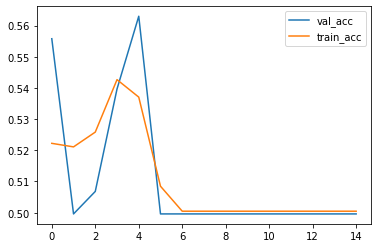

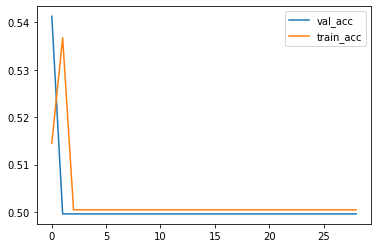

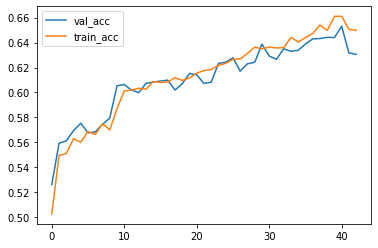

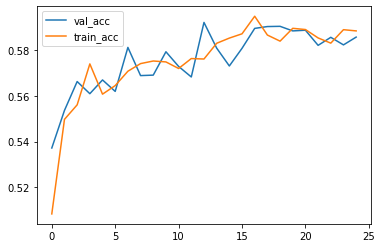

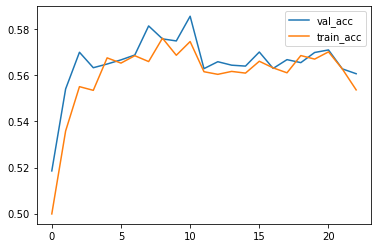

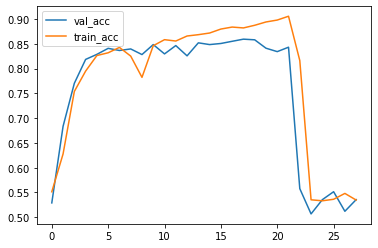

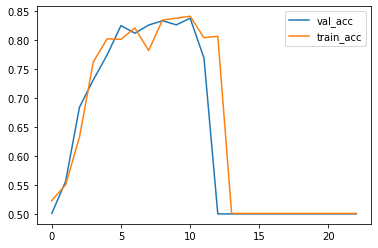

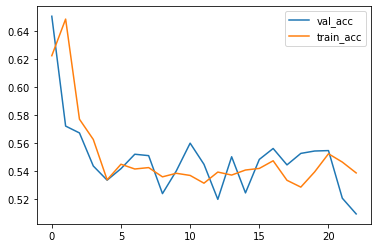

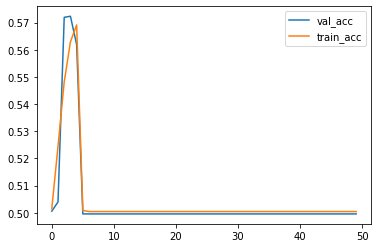

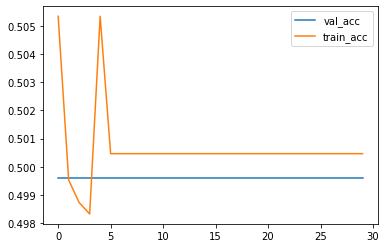

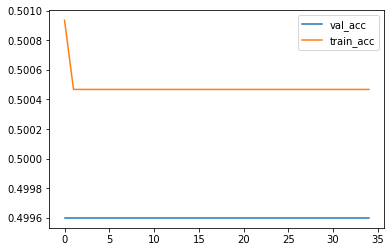

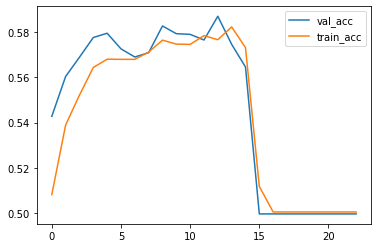

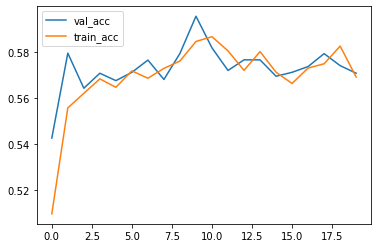

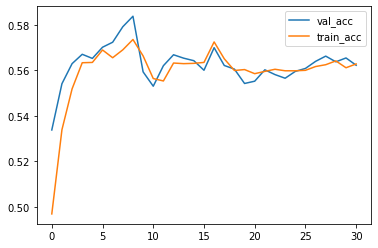

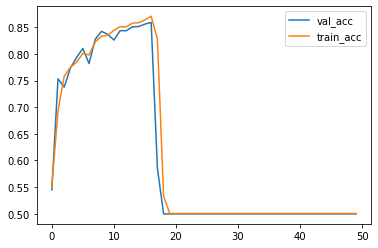

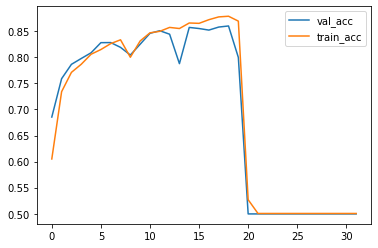

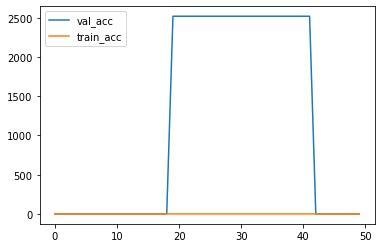

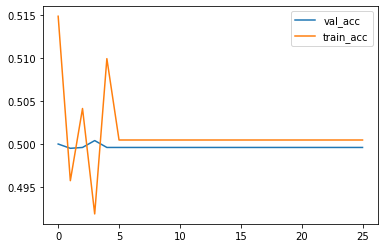

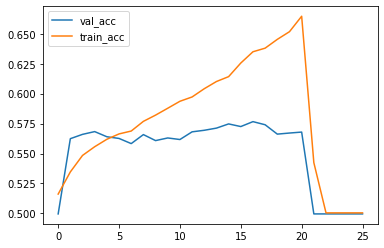

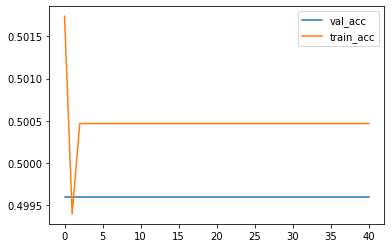

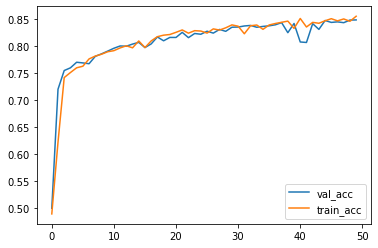

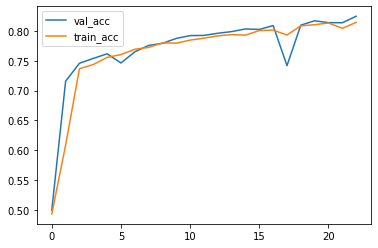

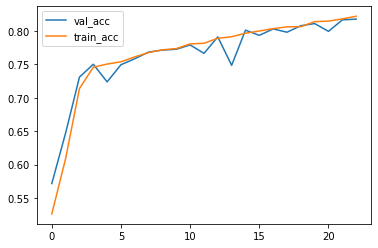

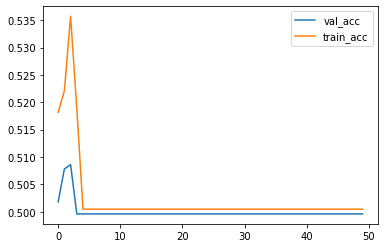

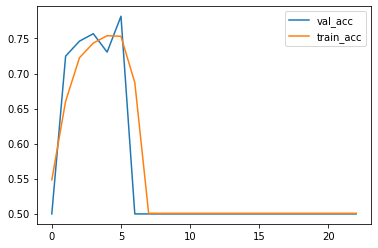

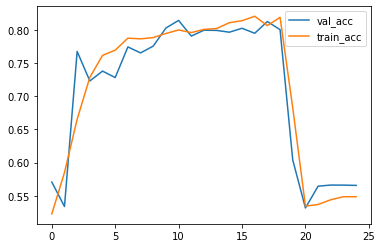

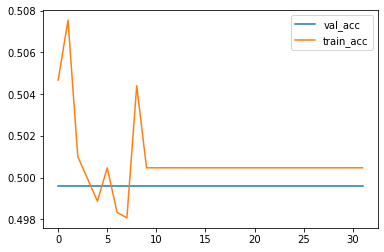

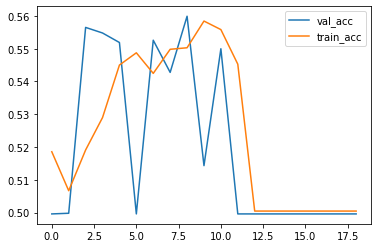

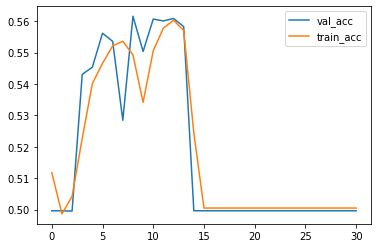

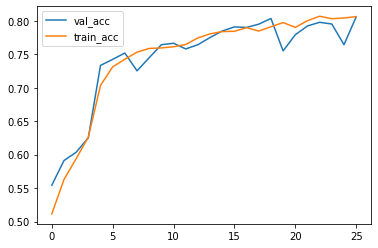

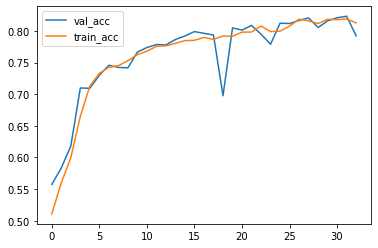

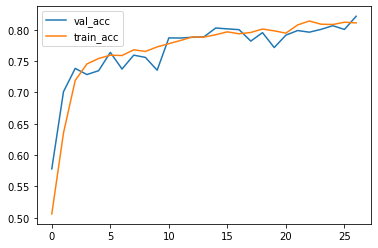

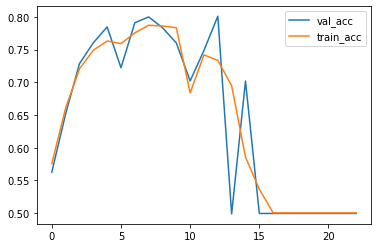

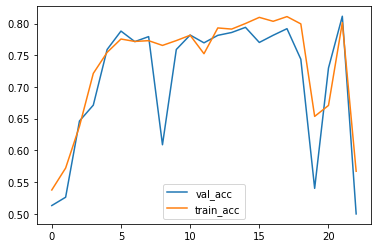

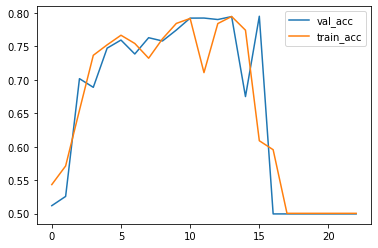

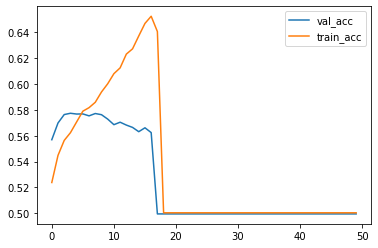

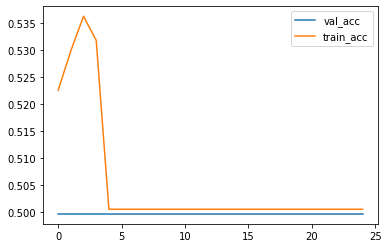

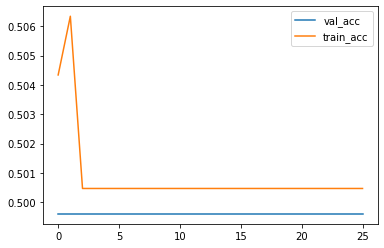

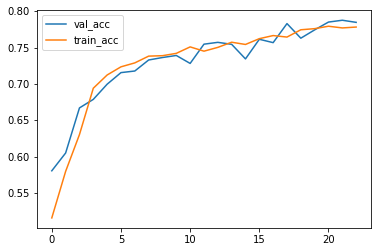

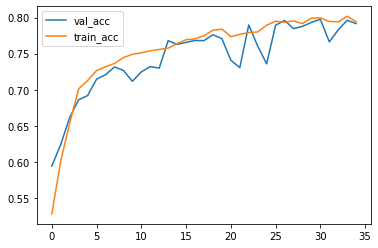

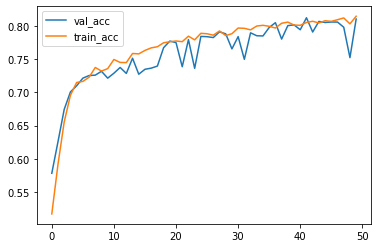

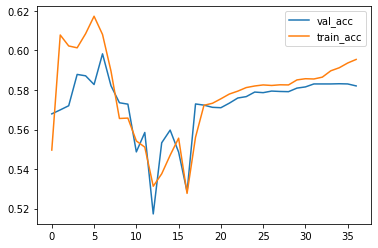

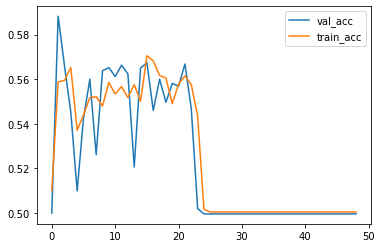

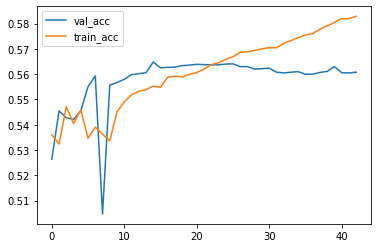

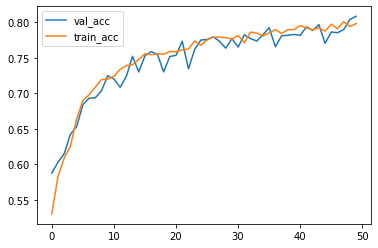

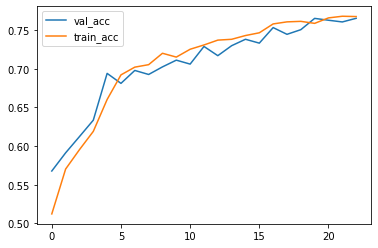

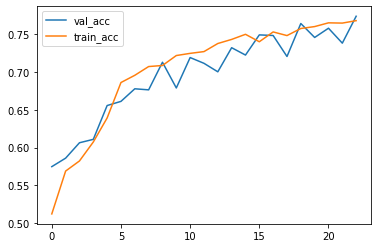

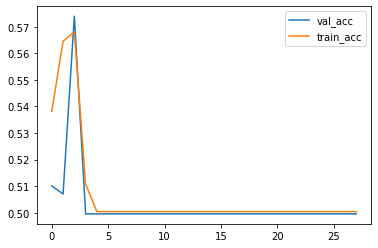

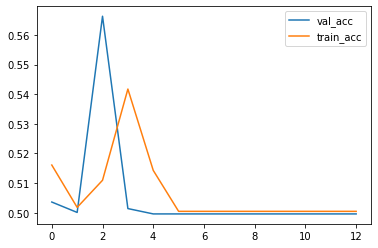

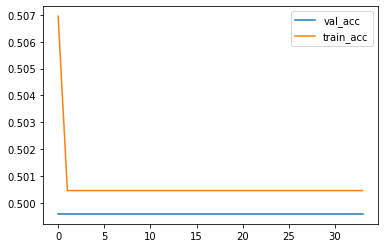

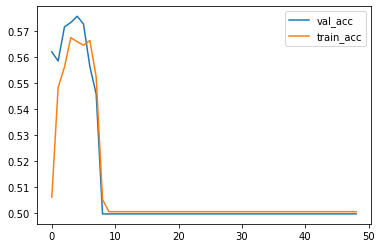

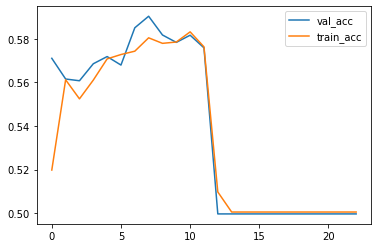

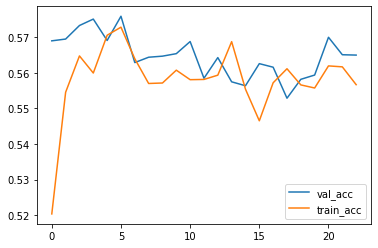

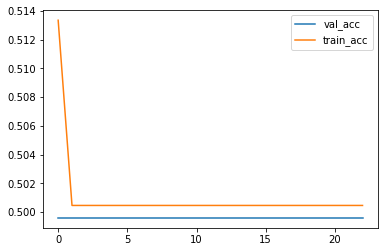

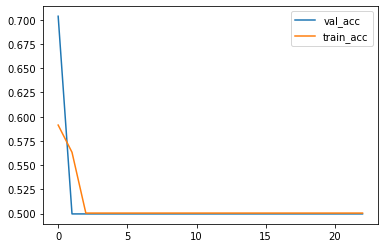

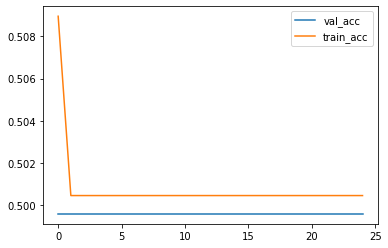

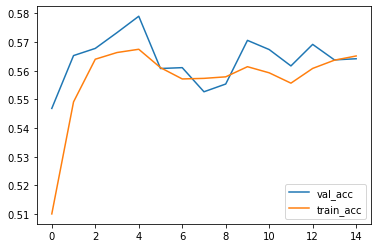

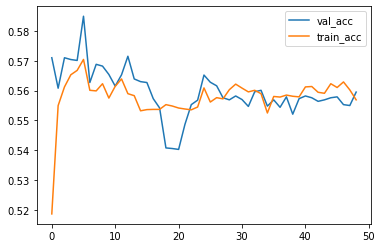

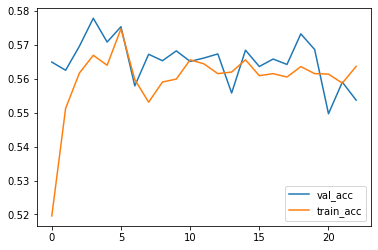

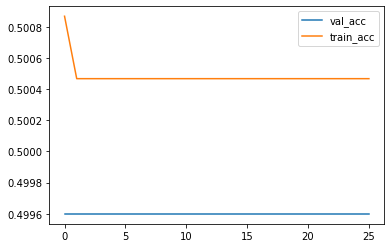

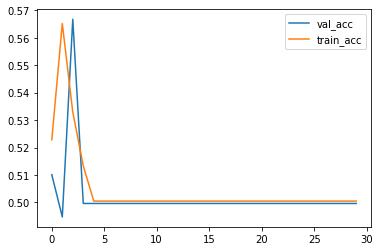

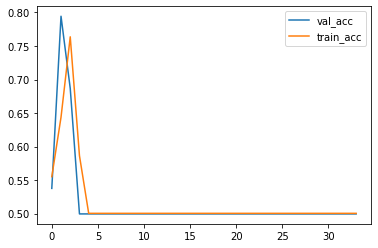

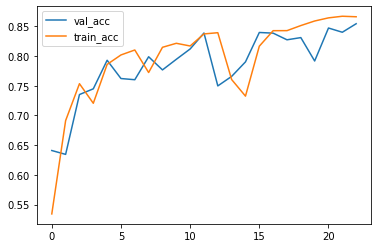

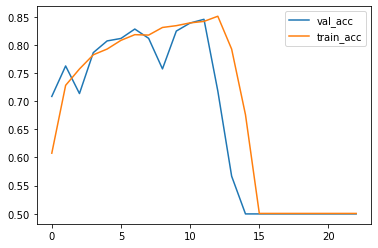

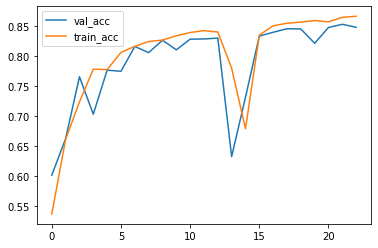

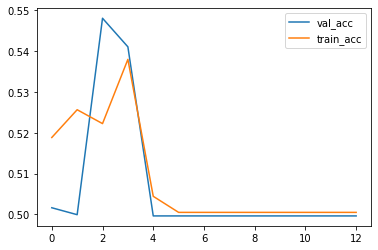

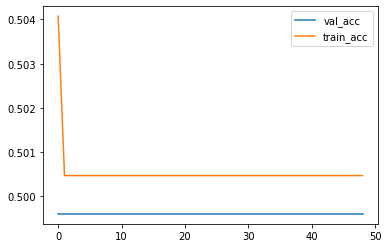

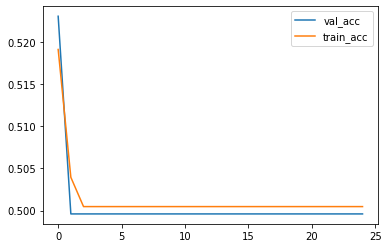

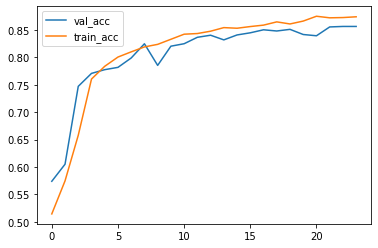

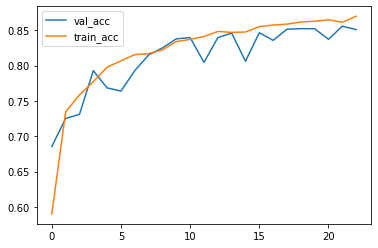

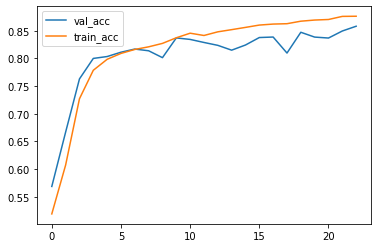

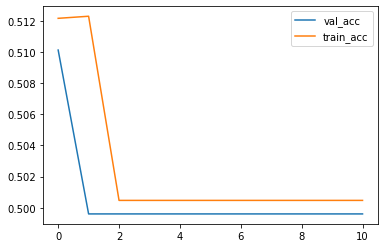

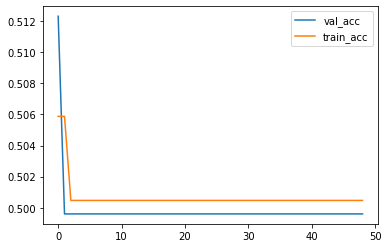

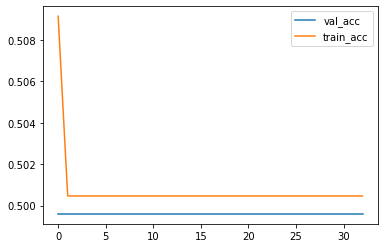

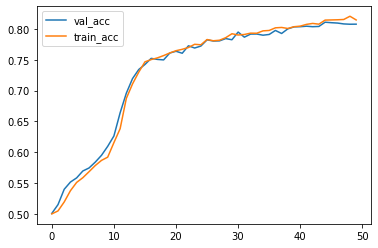

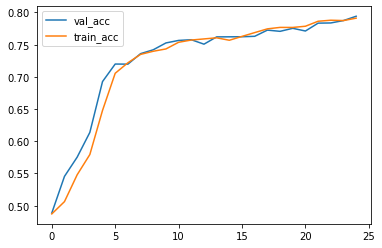

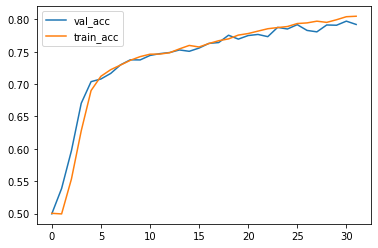

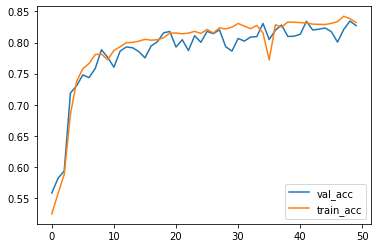

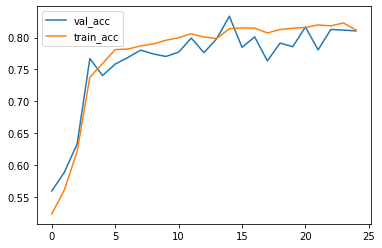

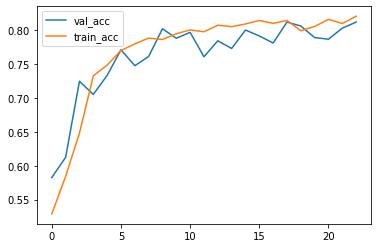

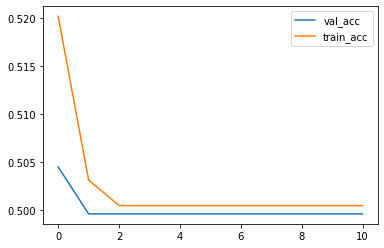

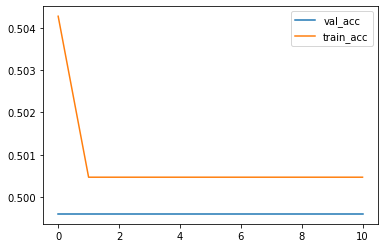

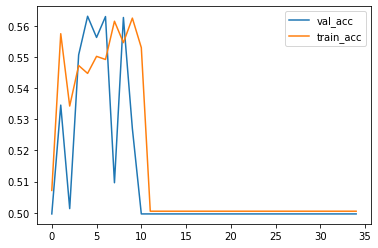

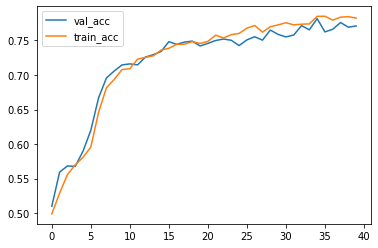

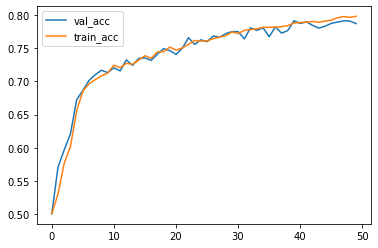

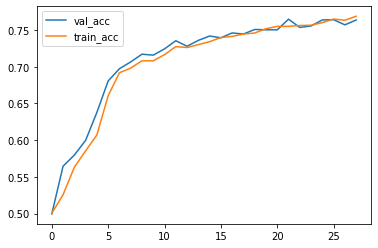

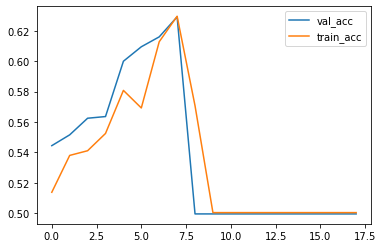

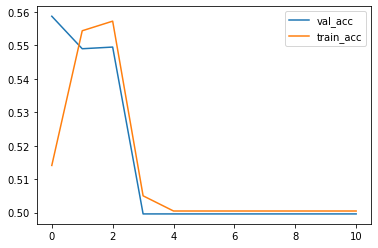

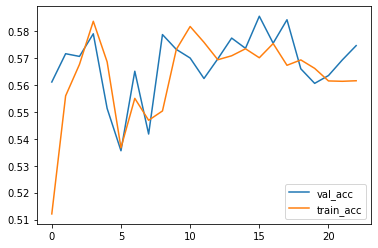

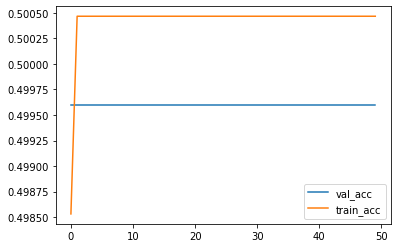

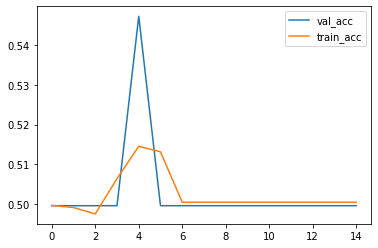

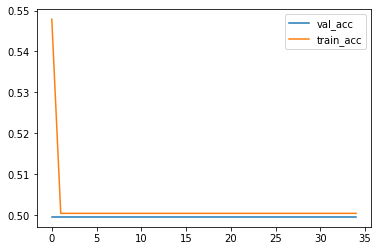

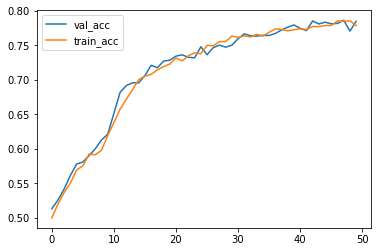

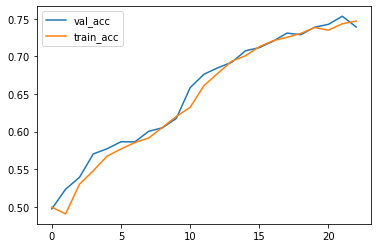

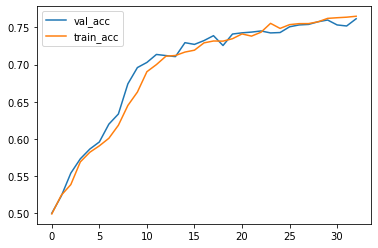

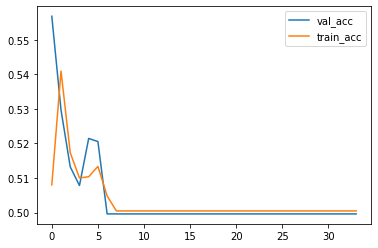

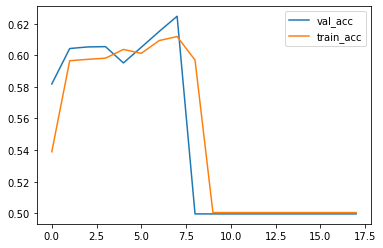

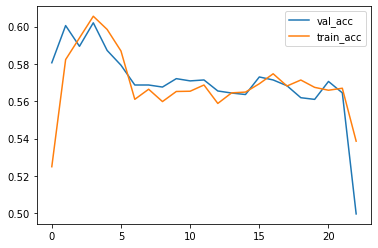

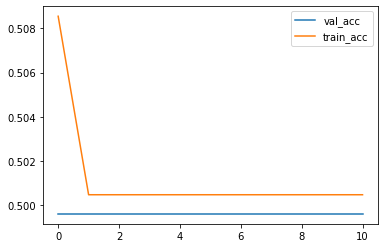

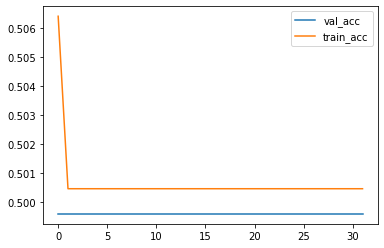

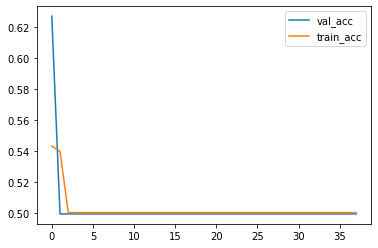

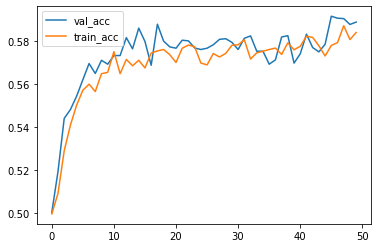

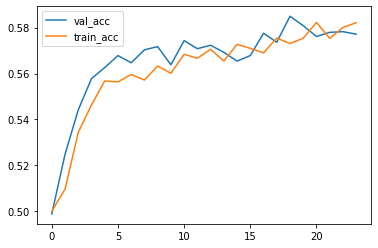

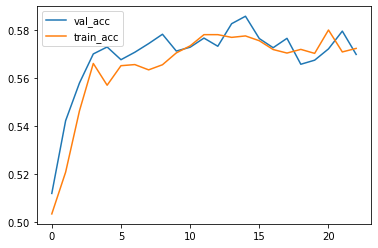

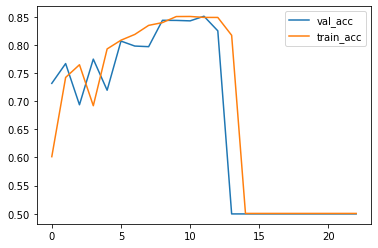

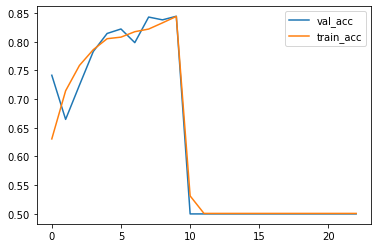

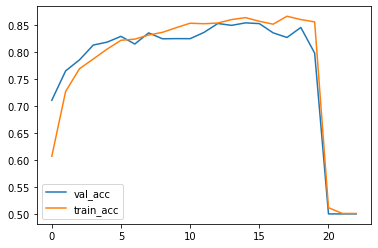

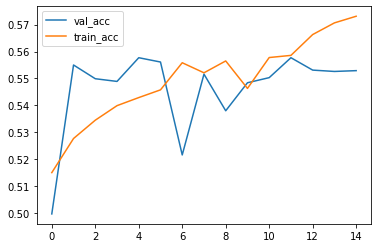

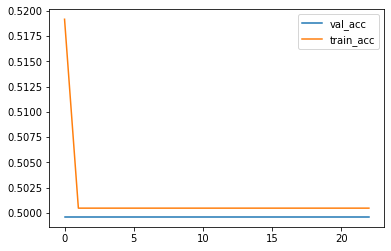

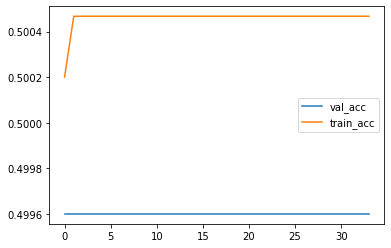

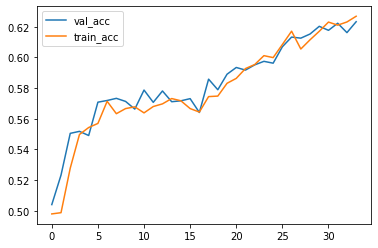

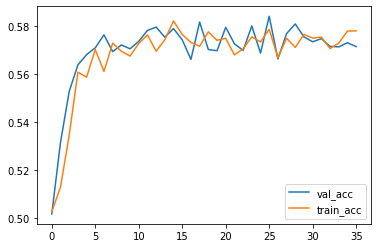

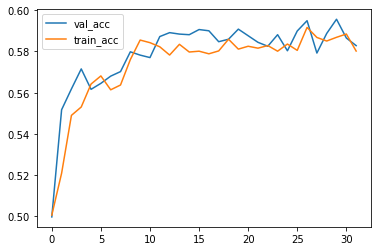

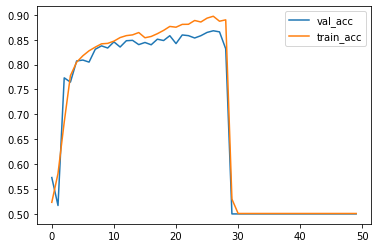

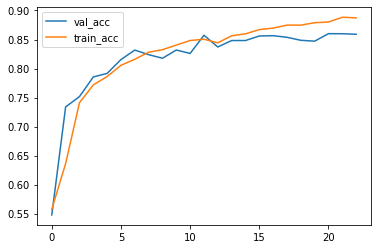

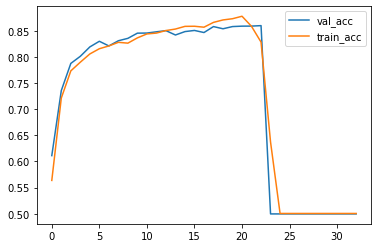

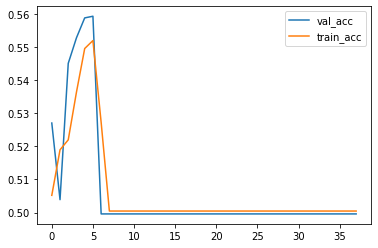

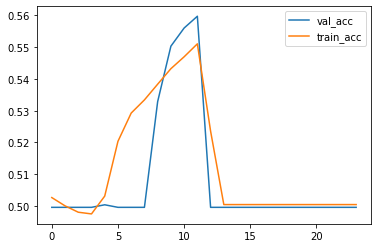

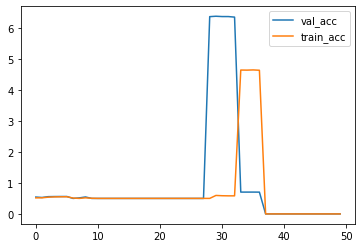

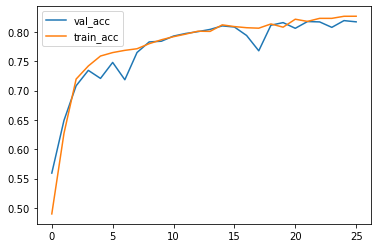

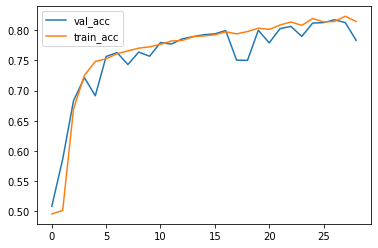

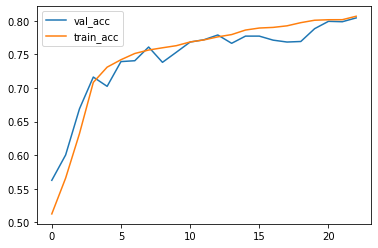

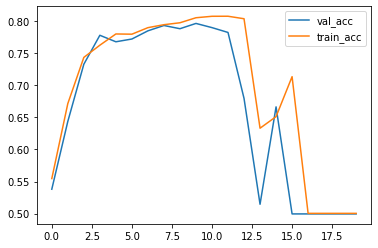

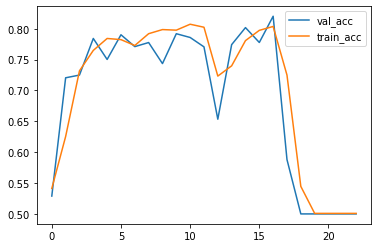

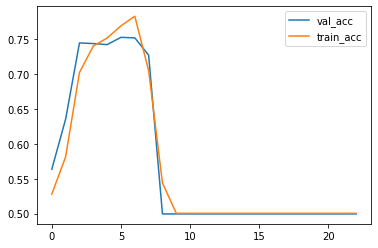

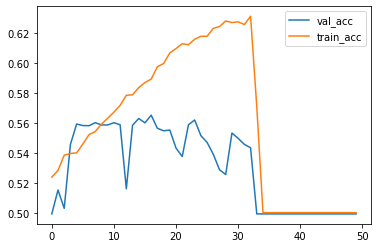

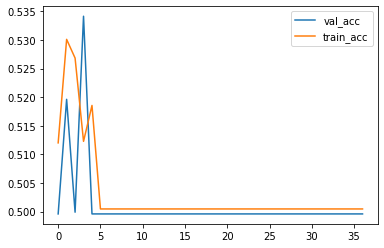

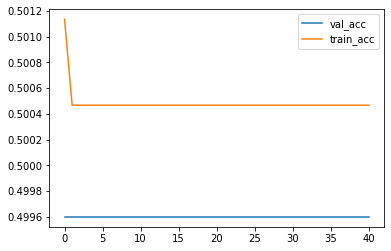

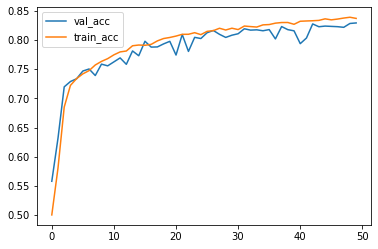

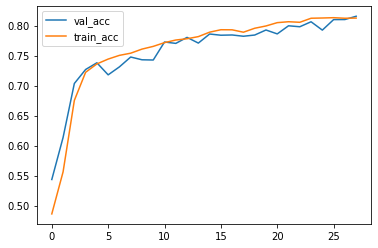

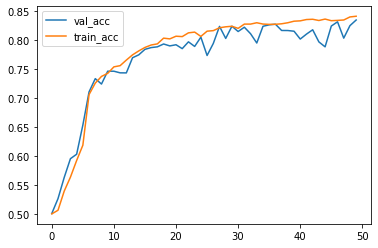

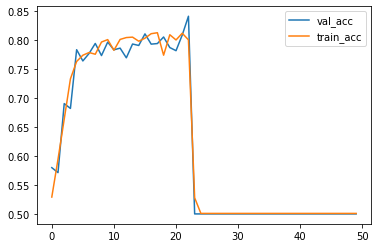

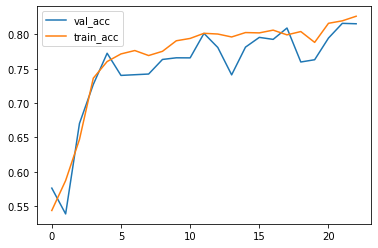

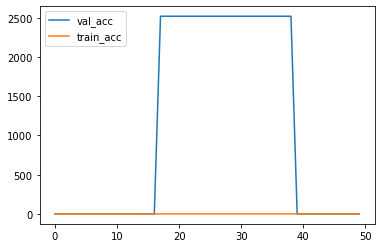

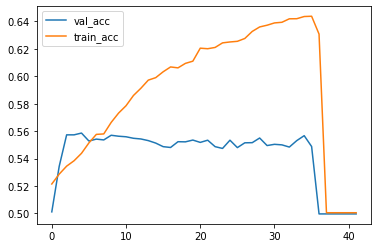

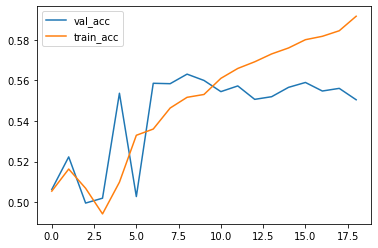

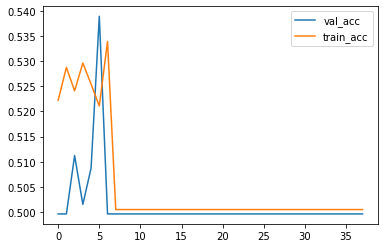

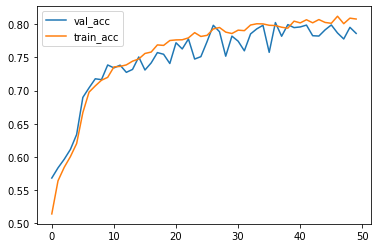

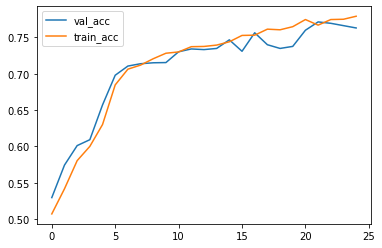

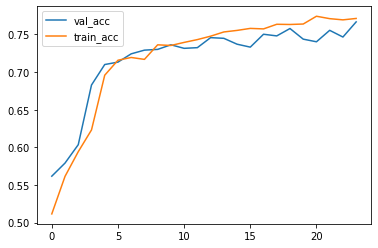

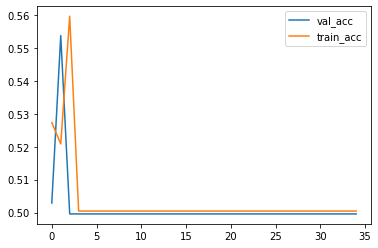

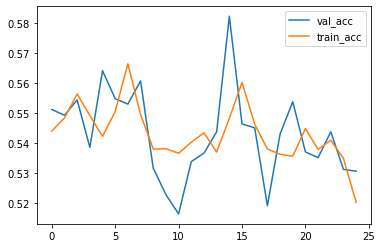

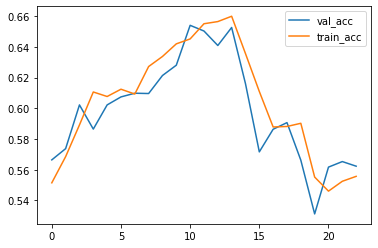

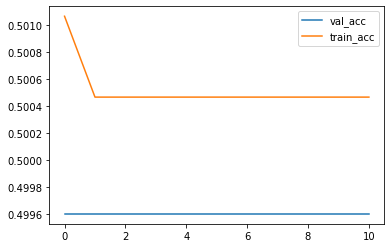

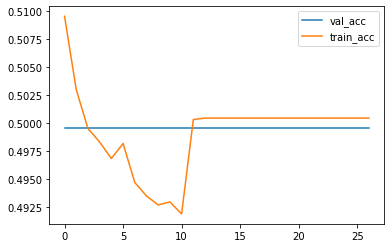

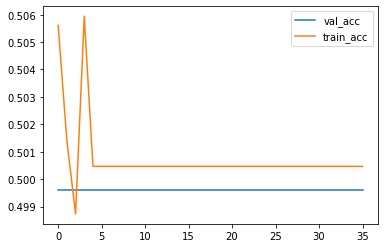

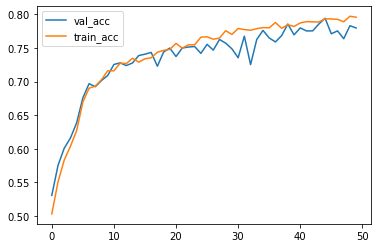

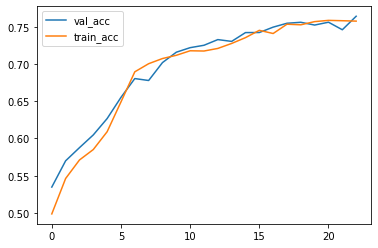

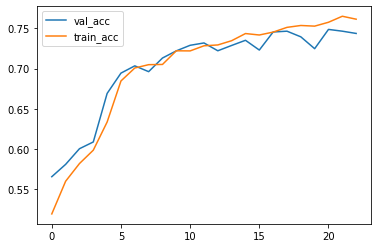

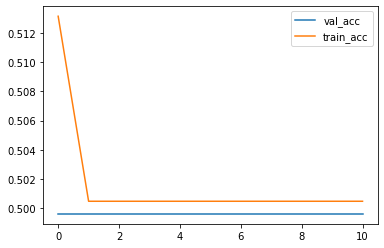

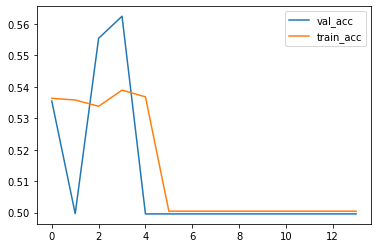

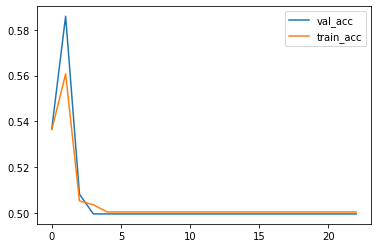

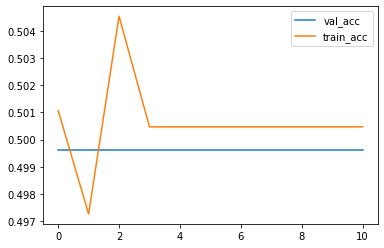

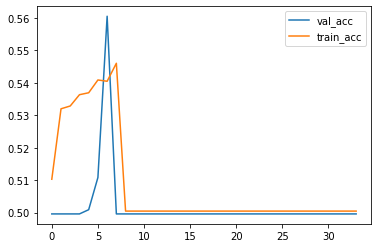

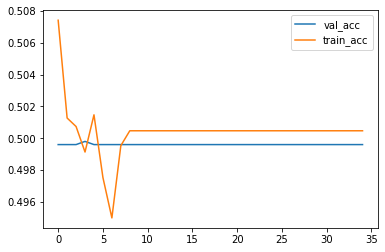

In [14]:
if not os.path.exists(f"{folder}/plots"):
    os.makedirs(f"{folder}/plots")

for i, df in enumerate(csvs):
    df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/plots/idx{i}_acc{round(best_accs[i], 2)}_lr{csvs[i].learning_rate[0]}_hu{csvs[i].hidden_units[0]}.png")

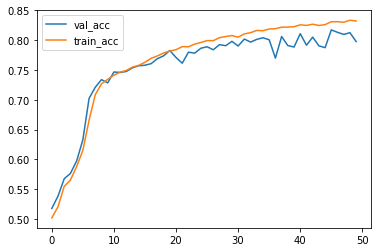

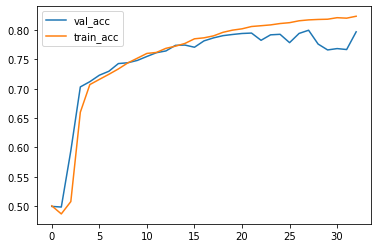

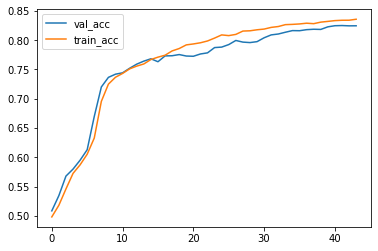

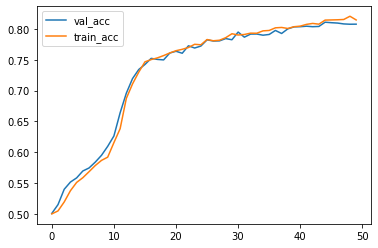

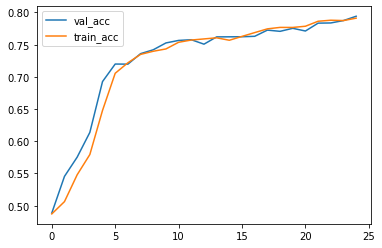

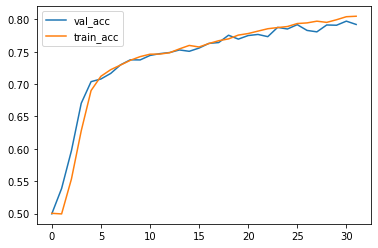

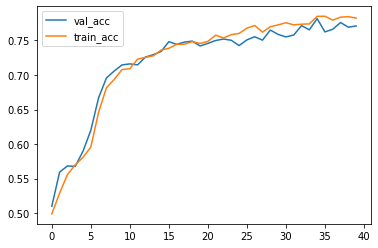

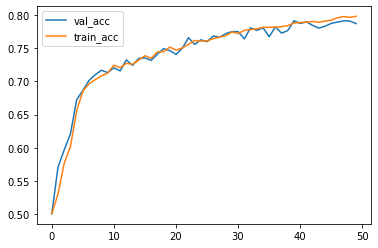

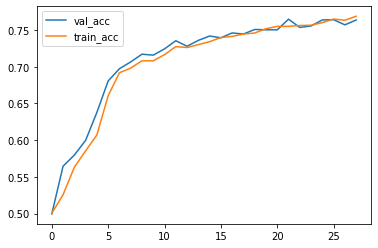

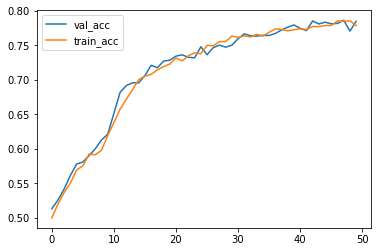

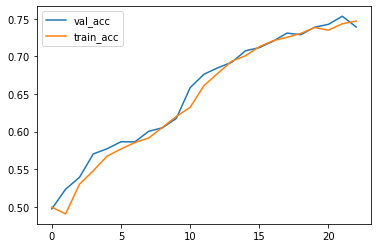

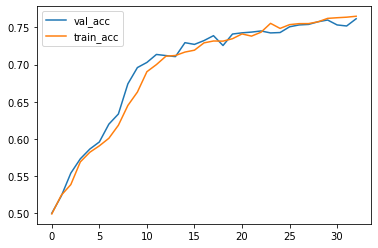

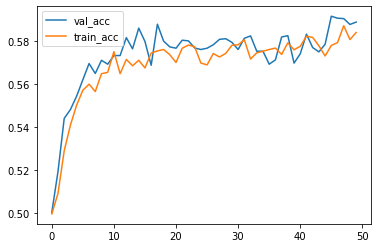

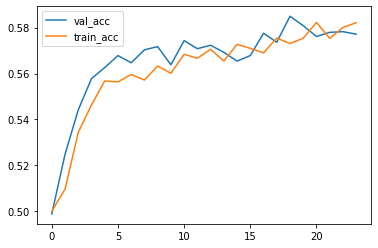

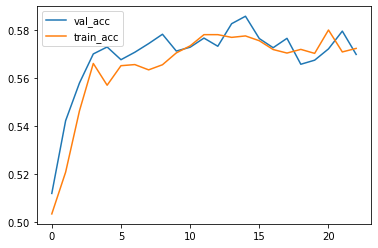

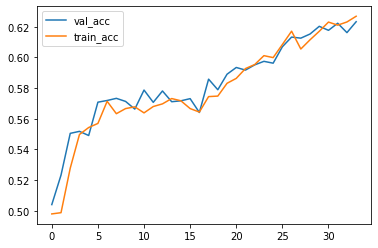

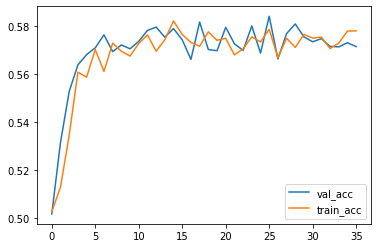

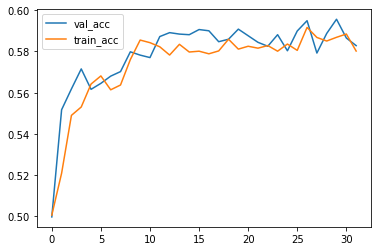

In [15]:
if not os.path.exists(f"{folder}/lrplots"):
    os.makedirs(f"{folder}/lrplots")

for i, df in enumerate(lr0001):
    df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/lrplots/idx{i}.png")

In [24]:
best_hyper = pd.concat(lr0001)

best_hyper_diff = best_hyper['val_acc'].diff()
best_hyper_diff.loc[20.abs().mean()

0.014766461704580987